CS166 Pre-class work 12.1
# Ising Model
#### March 31, 2020 | Rebecca Mqamelo 

In [1]:
import matplotlib as plt
import numpy as np
import random as rn
%matplotlib inline
from pylab import *

In [41]:
class IsingModel():
    
    def __init__(self, size, T, steps):
        '''Initialize system parameters'''
        
        self.size = size
        self.T = T
        self.initialize()
        self.steps = steps
        
        
    def initialize(self):
        '''Initialize a random configuration for the system'''
        self.state = np.random.choice([1,-1],(self.size, self.size))
        
        
    def update(self):
        '''
        Update a randomly chosen cell according to the rules
        '''
        i, j = np.random.choice(range(self.size), 2)
        
        # Module for periodic boundary
        neighbors = [self.state[(i-1)%self.size, j],
                     self.state[i, (j-1)%self.size],
                     self.state[(i+1)%self.size, j],
                     self.state[i, (j+1)%self.size]]
        
        '''
        Check how well the cell is aligned with its neighbors 
        by computing the product of the central cell with each neighbor. 
        If two cells are aligned (have the same sign), their product will 
        be +1. If two cells are misaligned (have opposite signs), their product
        will be –1. The negative of the sum of these products is the energy of the cell.
        '''
        E = -1*self.state[i,j]*sum(neighbors)
        
        # Flip the sign of cell (i,j) with probability min(1, e^(2*E_i,j/T))
        # where T>0 is a parameter of the model
        if np.random.random() < min(1,np.exp(2*E/self.T)):
            self.state[i,j] = -1*self.state[i,j]
            
            
    def simulate(self, runs):
        
        avg_magnetism = []
        for r in range(runs):
            self.initialize()
            for s in range(self.steps):
                self.update()
            avg_mag_i = sum(sum(self.state))/(self.size**2)
            avg_magnetism.append(avg_mag_i)
        
        return avg_magnetism
    
    
    def observe(self):
        imshow(self.state, vmin=-1, vmax=1)


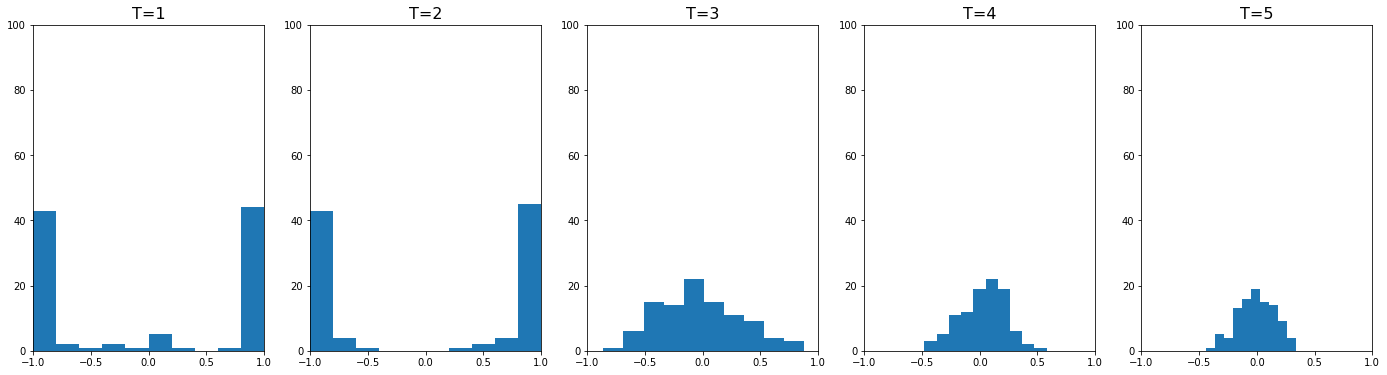

In [42]:
size=10
runs=100
steps=10000

plt.figure(figsize=(24,6))
plt.title("Histograms of Final Average Magnetization for T=1,2,3,4,5")

for temp in range(1,6):
    sim = IsingModel(size, temp, steps)
    results = sim.simulate(runs)
    plt.subplot(1,5, temp)
    plt.title('T={}'.format(temp), fontsize=16)
    plt.xlim(-1,1)
    plt.ylim(0,runs)
    plt.hist(results)
    
plt.show()